##### Libraries

In [1]:
import pandas as pd
import numpy as np
import math

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [9]:
import warnings
warnings.filterwarnings('ignore')

#### Task1

In [16]:
# a) load the dataset
bike = pd.read_csv('DS1_C9_S2_Practice_BikeSales_Data.csv')
bike

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
2,02-08-2013,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5.0,45,120.0,369.0,225.0,594
3,02-08-2015,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,45,120.0,517.0,315.0,832
4,02-09-2013,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2.0,45,120.0,148.0,90.0,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18-02-2014,18,February,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,13.0,2,5.0,38.0,26.0,64
496,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,31.0,2,5.0,91.0,62.0,153
497,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,11.0,2,5.0,32.0,22.0,54
498,04-03-2014,4,March,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,5.0,2,5.0,15.0,10.0,25


In [18]:
# b) Extract 4 columns into a data frame
bike_df = bike[['Revenue','Order_Quantity','Unit_Cost','Unit_Price','Customer_Age']]
bike_df

,Revenue,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age
0,950,8.0,45,120.0,19
1,950,8.0,45,120.0,19
2,594,5.0,45,120.0,29
3,832,7.0,45,120.0,29
4,238,2.0,45,120.0,29
...,...,...,...,...,...
495,64,13.0,2,5.0,37
496,153,31.0,2,5.0,37
497,54,11.0,2,5.0,37
498,25,5.0,2,5.0,37


In [20]:
# c) understanding the features
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Revenue         500 non-null    int64  
 1   Order_Quantity  495 non-null    float64
 2   Unit_Cost       500 non-null    int64  
 3   Unit_Price      497 non-null    float64
 4   Customer_Age    500 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 19.7 KB


In [22]:
bike_df.describe()

,Revenue,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age
count,500.000000,495.000000,500.000000,497.000000,500.000000
mean,343.216000,13.375758,16.548000,43.601610,36.588000
std,556.346929,9.249150,21.759473,58.344484,11.363649
min,5.000000,1.000000,2.000000,5.000000,17.000000
25%,69.000000,5.000000,2.000000,5.000000,31.000000
50%,129.000000,12.000000,3.000000,9.000000,35.000000
75%,272.000000,22.000000,45.000000,120.000000,42.000000
max,3564.000000,32.000000,59.000000,159.000000,73.000000


#### Task2

In [25]:
# a) Missing value treatment
bike_df['Order_Quantity']=bike_df['Order_Quantity'].fillna(bike_df['Order_Quantity'].mean())
bike_df['Unit_Price']=bike_df['Unit_Price'].fillna(bike_df['Unit_Price'].mean())
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Revenue         500 non-null    int64  
 1   Order_Quantity  500 non-null    float64
 2   Unit_Cost       500 non-null    int64  
 3   Unit_Price      500 non-null    float64
 4   Customer_Age    500 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 19.7 KB


In [27]:
# outlier treatment
for col in bike_df.columns:
    ser=pd.Series(bike_df[col])
    q1=ser.quantile(0.25)
    q3=ser.quantile(0.75)
    iqr=q3-q1
    lf=q1-1.5*iqr
    uf=q3+1.5*iqr
    for z in ser:
        if z > uf:
            bike_df[col]=bike_df[col].replace(to_replace=z,value=uf)
        elif z < lf:
            bike_df[col]=bike_df[col].replace(to_replace=z,value=lf)

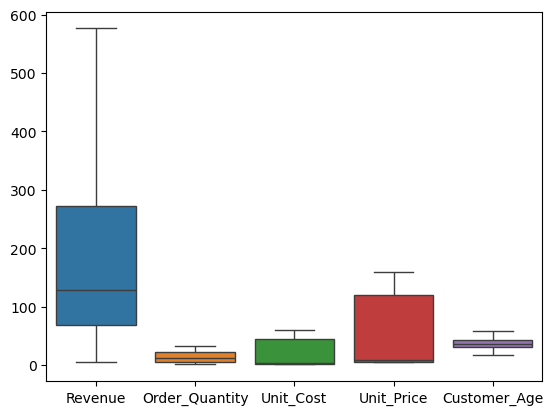

In [29]:
sns.boxplot(bike_df)
plt.show()

In [31]:
# b) Feature engineering
cols=bike_df.columns
scale = StandardScaler()
df_scld= scale.fit_transform(bike_df)
df_scaled=pd.DataFrame(df_scld,columns=cols)
df_scaled

,Revenue,Order_Quantity,Unit_Cost,Unit_Price,Customer_Age
0,1.826079,-0.584735,1.308878,1.314706,-1.634155
1,1.826079,-0.584735,1.308878,1.314706,-1.634155
2,1.826079,-0.911053,1.308878,1.314706,-0.687477
3,1.826079,-0.693508,1.308878,1.314706,-0.687477
4,0.136684,-1.237371,1.308878,1.314706,-0.687477
...,...,...,...,...,...
495,-0.731720,-0.040872,-0.669252,-0.664278,0.069865
496,-0.287537,1.917035,-0.669252,-0.664278,0.069865
497,-0.781629,-0.258417,-0.669252,-0.664278,0.069865
498,-0.926363,-0.911053,-0.669252,-0.664278,0.069865


In [33]:
df_scaled.corr()[['Revenue']].sort_values(['Revenue'])

,Revenue
Order_Quantity,-0.070528
Customer_Age,0.096247
Unit_Price,0.804100
Unit_Cost,0.815590
Revenue,1.000000


#### Task3

In [35]:
# a) Train and test split of model
X_c = np.array(df_scaled['Unit_Cost']).reshape(-1,1)
y = np.array(df_scaled['Revenue'])
X_train_c,X_test_c,y_train,y_test=train_test_split(X_c,y,test_size=0.3,random_state=0)
# build model
s_model = LinearRegression().fit(X_train_c,y_train)

In [37]:
y_pred_c = s_model.predict(X_test_c)
print(y_pred_c)

[ 1.04196893 -0.52661476 -0.52661476 -0.52661476 -0.52661476  1.04196893
 -0.45365738 -0.52661476 -0.45365738 -0.45365738 -0.52661476 -0.52661476
 -0.45365738 -0.52661476 -0.52661476 -0.45365738 -0.52661476 -0.52661476
 -0.45365738  1.04196893 -0.49013607 -0.52661476 -0.52661476  1.55267059
  1.04196893 -0.52661476  1.04196893 -0.52661476  1.04196893 -0.52661476
 -0.52661476  1.55267059  1.55267059 -0.49013607 -0.52661476 -0.52661476
 -0.45365738 -0.52661476 -0.52661476 -0.52661476 -0.45365738  1.04196893
 -0.45365738 -0.52661476  1.04196893  1.04196893 -0.49013607 -0.45365738
 -0.52661476  1.04196893 -0.52661476 -0.52661476 -0.52661476  1.55267059
  1.55267059  1.04196893 -0.45365738 -0.52661476 -0.52661476 -0.52661476
  1.04196893 -0.52661476 -0.45365738 -0.52661476 -0.52661476 -0.49013607
  1.04196893 -0.52661476 -0.52661476  1.04196893  1.55267059  1.04196893
 -0.52661476 -0.52661476 -0.52661476 -0.52661476 -0.52661476  1.04196893
 -0.52661476 -0.52661476 -0.52661476 -0.52661476 -0

In [39]:
# b) slope & intercept
print('Slope:',s_model.coef_)
print('intercept:',s_model.intercept_)

Slope: [0.79296291]
intercept: 0.004077226644902933


#### Task4

In [41]:
# a) MSE, MAE, RMSE, R2_score
mse=mean_squared_error(y_test,y_pred_c)
print('MSE:',mse)
mae=mean_absolute_error(y_test,y_pred_c)
print('MAE:',mae)
rmse=mean_squared_error(y_test,y_pred_c,squared=False)
print('RMSE:',rmse)
r2=r2_score(y_test,y_pred_c)
print('R2 score:',r2)

MSE: 0.2895475952333508
MAE: 0.4117876450352506
RMSE: 0.5380962694846999
R2 score: 0.7041192543192466


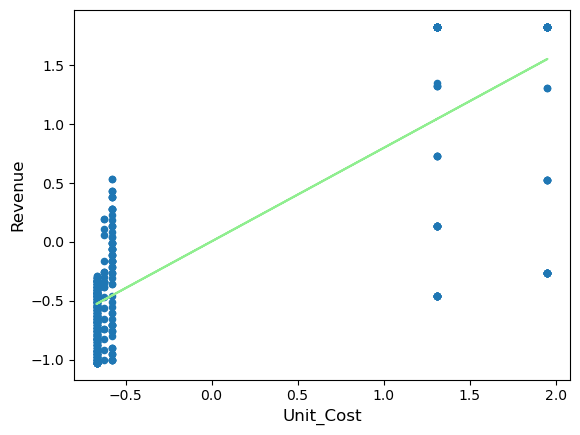

In [43]:
# b) visualise linear regression model with its data
fig,ax=plt.subplots()
ax.set_xlabel("xlabel",fontsize=12)
ax.set_ylabel("ylabel",fontsize=12)
df_scaled.plot.scatter(x='Unit_Cost',y='Revenue',ax=ax)
plt.plot(X_test_c,y_pred_c,color='lightgreen')
plt.show()

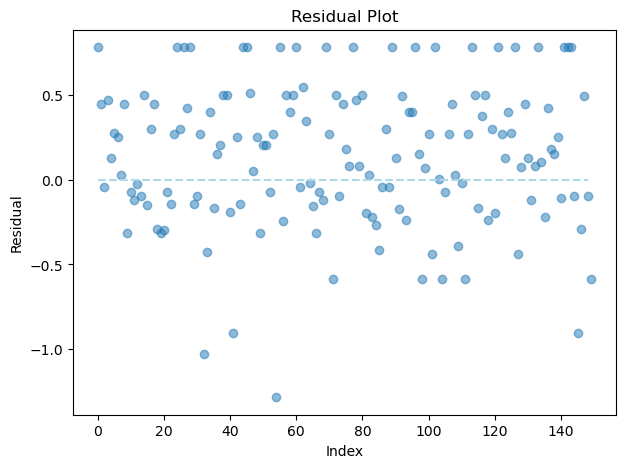

In [45]:
# c) Plotting residuals
df = pd.DataFrame({'Actual':y_test,'Predict':y_pred_c})
df['residue']=abs(df['Actual'])-abs(df['Predict'])
plt.subplots(figsize=(7,5))
ax=plt.subplot(111)
plt.scatter(x=df.index,y=df.residue,alpha=0.5)
plt.plot(np.repeat(0,df.index.max()),color='lightblue',linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Index")
plt.ylabel("Residual")
plt.show()

The error values are spread around zero line both above and below. There is some homoscedasticity